# Oil Model

You can create `Oil`, `Gas` and `Water` Python Objects that contain the main information that allow to characterize the fluid. They can contain, PVT, Chromatography, gravity among other values specific to the fluid. 

By creating an `Oil` object you can obtain a PVT table throughout common correlations described by Ahmed (Reservoir Engineering Handbook & Equation of State and PVT Analysis ) and by Banzer (Correlaciones Numéricas PVT)


In [1]:
from pvtpy.pvt import PVT
import pvtpy.black_oil as bk
from pvtpy.fluids import Oil, InitialConditions
from pvtpy.units import Pressure, Temperature
import numpy as np
import pandas as pd
import seaborn as sns

## Initial Conditions.

It is required to provide initial conditions 

In [2]:
init = InitialConditions(pressure=Pressure(value=3600), temperature=Temperature(value=160))

In [3]:
oil1 = Oil(
    initial_conditions=init,
    api = 31,
    rsb = 675,
    sg_gas = 0.95
)
oil1

Oil(initial_conditions=InitialConditions(pressure=Pressure(value=3600.0, unit=<PressureUnits.psi: 'psi'>), temperature=Temperature(value=160.0, unit=<TemperatureUnits.farenheit: 'farenheit'>)), pvt=None, chromatography=None, api=31.0, sulphur=None, pb=None, rsb=675.0, sg_gas=0.95)

Once created an Oil object without a PVT, you can generate a tabulated table with the main properties using PVT correlations. 

To set the the correlations to be used initialize an instance of `bk.SetOilCorrelations'. By default it has certain correlations 

In [4]:
cor = bk.SetOilCorrelations()
cor.dict()

{'pb': <pb_correlations.standing: 'standing'>,
 'rs': <rs_correlations.standing: 'standing'>,
 'bo': <bo_correlations.standing: 'standing'>,
 'co_above': <co_above_correlations.vazquez_beggs: 'vazquez_beggs'>,
 'co_below': <co_below_correlations.mccain: 'mccain'>,
 'muod': <muod_correlations.beal: 'beal'>,
 'muo_above': <muo_above_correlations.beal: 'beal'>,
 'muo_below': <muo_below_correlations.beggs: 'beggs'>,
 'rho': <rho_correlations.banzer: 'banzer'>}

In [5]:
oil1.pvt_from_correlation(start_pressure=20, end_pressure=5000, n=20, correlations=cor)

print(oil1.pvt.df())

                     rs        bo        co       muo        rho
pressure                                                        
20.000000     70.222511  1.076649  0.018716  2.272673  51.178738
282.105263   210.895351  1.144722  0.000403  1.408308  49.537946
544.210526   285.093631  1.182737  0.000156  1.191746  48.641478
806.315789   346.908386  1.215335  0.000088  1.062432  47.890476
1068.421053  403.667546  1.245936  0.000058  0.969604  47.201993
1330.526316  458.048011  1.275809  0.000043  0.897034  46.545992
1592.631579  511.335510  1.305572  0.000033  0.837464  45.908448
1854.736842  564.242666  1.335573  0.000026  0.787013  45.281961
2116.842105  617.201069  1.366026  0.000022  0.743351  44.662384
2378.947368  670.488149  1.397074  0.000018  0.704963  44.047339
2641.052632  675.000000  1.394688  0.000015  0.712684  43.926841
2903.157895  675.000000  1.390158  0.000014  0.724424  43.784158
3165.263158  675.000000  1.386389  0.000013  0.736164  43.665459
3427.368421  675.000000  

In [6]:
oil1.pvt.interpolate([500,1500,2500,3500])

,rs,bo,co,muo,rho
pressure,,,,,
500,272.578258,1.176325,0.000197,1.228274,48.792690
1500,492.502980,1.295053,0.000036,0.858517,46.133765
2500,672.571936,1.395972,0.000017,0.708529,43.991687
3500,675.000000,1.382449,0.000011,0.751157,43.541375


array([<AxesSubplot:xlabel='pressure'>, <AxesSubplot:xlabel='pressure'>,
       <AxesSubplot:xlabel='pressure'>, <AxesSubplot:xlabel='pressure'>,
       <AxesSubplot:xlabel='pressure'>], dtype=object)

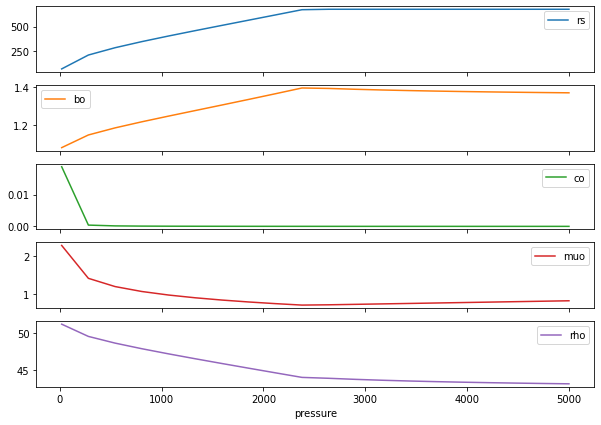

In [7]:
oil1.pvt.df().plot(subplots=True, figsize=(10,7))

In [8]:
print(oil1.to_ecl())

-- OIL PVT TABLE FOR LIVE OIL
PVTO
-- rs      pres  bo      visc
-- Mscf/rb psi   RB/STB  cP  
-- ------- ----  ----    ---- 
0.070 20.000 1.077 2.273/
0.212 284.559 1.145 1.406/
0.286 549.119 1.183 1.189/
0.349 813.678 1.216 1.060/
0.406 1078.238 1.247 0.967/
0.461 1342.797 1.277 0.894/
0.514 1607.356 1.307 0.835/
0.568 1871.916 1.338 0.784/
0.621 2136.475 1.368 0.740/
0.671 2401.035 1.397 0.706
-- Unsaturated Data
2920.828 1.390 0.725
3440.621 1.383 0.748
3960.414 1.378 0.772
4480.207 1.374 0.795
5000.000 1.371 0.818/
/


In [10]:
oil2 = Oil(
    initial_conditions=init,
    api = 25,
    pb = Pressure(value=2100),
    sg_gas = 0.6
)
oil2.pvt_from_correlation(start_pressure=20, end_pressure=5000, n=20, correlations=cor)
oil2.pvt.df()

,rs,bo,co,muo,rho
pressure,,,,,
20.000000,2.873694,1.046123,0.012861,8.447486,53.901805
282.105263,28.747443,1.054990,0.000277,6.737769,53.698104
544.210526,60.407690,1.066069,0.000107,5.393595,53.439907
806.315789,95.309130,1.078550,0.000060,4.420860,53.145589
1068.421053,132.574227,1.092162,0.000040,3.709634,52.821985
1330.526316,171.730436,1.106756,0.000029,3.176832,52.473403
1592.631579,212.476920,1.122237,0.000023,2.767457,52.103128
1854.736842,254.603334,1.138534,0.000018,2.445519,51.713895
2116.842105,295.133551,1.154256,0.000011,2.218666,51.357348
